## 🔹 Load and Verify Dataset Structure

In [15]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

# Define dataset path
dataset_path = r"C:\Users\anujp\Desktop\Brain Tumor MRI Dataset\archive\Train"

# Get class names (subfolders)
classes = ["Glioma", "Meningioma", "Pituitary", "No Tumor"]


In [16]:
# Print dataset structure
for cls in classes:
    img_count = len(os.listdir(f"{dataset_path}/{cls}/images"))
    lbl_count = len(os.listdir(f"{dataset_path}/{cls}/labels"))
    print(f"📂 {cls}: {img_count} images, {lbl_count} labels")

📂 Glioma: 1153 images, 1153 labels
📂 Meningioma: 1449 images, 1449 labels
📂 Pituitary: 1424 images, 1424 labels
📂 No Tumor: 711 images, 711 labels


## 🔹 Count Images per Class

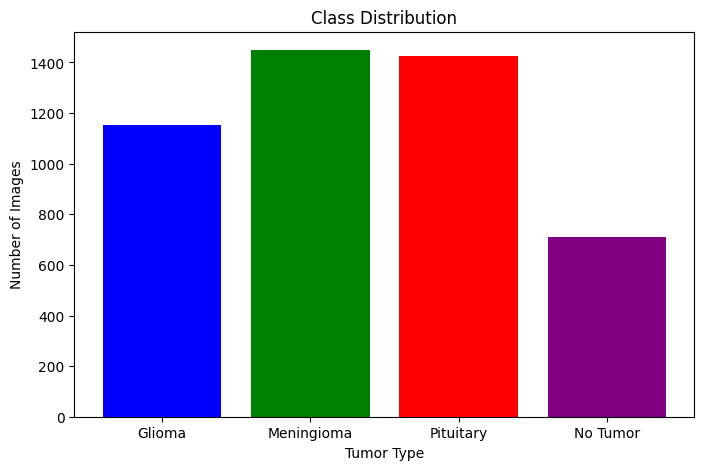

In [17]:
# Count images in each class
data_distribution = {cls: len(os.listdir(f"{dataset_path}/{cls}/images")) for cls in classes}

# Plot
plt.figure(figsize=(8, 5))
plt.bar(data_distribution.keys(), data_distribution.values(), color=["blue", "green", "red", "purple"])
plt.xlabel("Tumor Type")
plt.ylabel("Number of Images")
plt.title("Class Distribution")
plt.show()


## 🔹 Visualize Random Images from Each Class

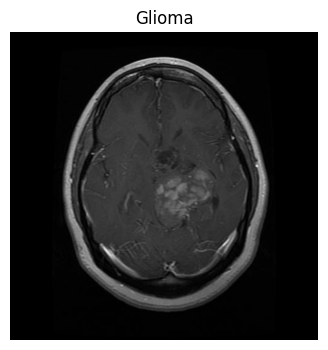

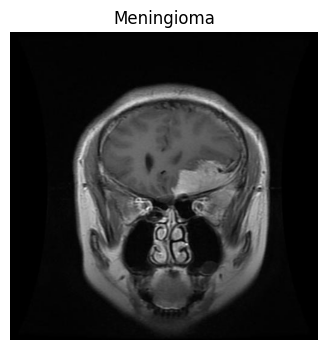

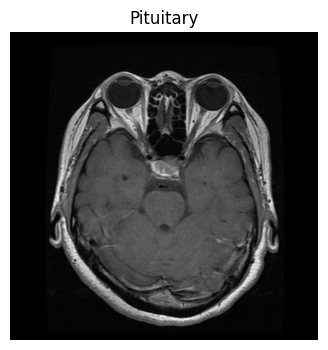

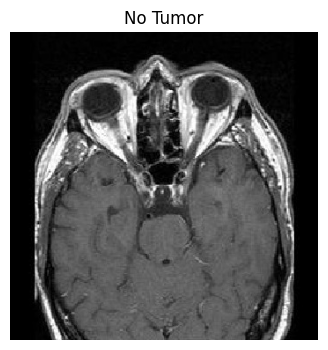

In [18]:
# Function to display sample images from each class
def display_sample_images(class_name):
    image_path = glob(f"{dataset_path}/{class_name}/images/*.jpg")[0]
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis("off")
    plt.title(class_name)
    plt.show()

# Display one image per class
for cls in classes:
    display_sample_images(cls)


🔹 Check Sample Bounding Box Annotation

In [19]:
# Read a sample annotation file
sample_label = glob(f"{dataset_path}/Glioma/labels/*.txt")[0]

with open(sample_label, "r") as file:
    annotations = file.readlines()

# Print the first few annotations
print("\nBounding Box Annotations (YOLO Format):")
print("\n".join(annotations[:5]))



Bounding Box Annotations (YOLO Format):
0 0.567383 0.519531 0.189453 0.148438



## 🔹 Overlay Bounding Box on Image

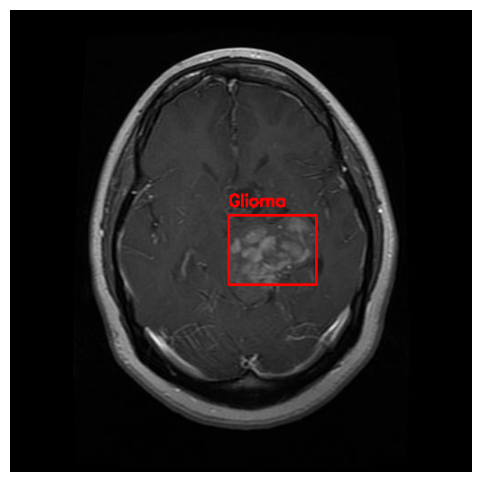

In [20]:
def plot_bounding_boxes(image_path, label_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    with open(label_path, "r") as file:
        labels = file.readlines()

    for label in labels:
        class_id, x_center, y_center, width, height = map(float, label.split())
        x1, y1 = int((x_center - width / 2) * w), int((y_center - height / 2) * h)
        x2, y2 = int((x_center + width / 2) * w), int((y_center + height / 2) * h)

        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(img, classes[int(class_id)], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Test with a sample image
sample_img = glob(f"{dataset_path}/Glioma/images/*.jpg")[0]
sample_lbl = sample_img.replace("images", "labels").replace(".jpg", ".txt")
plot_bounding_boxes(sample_img, sample_lbl)


## 🔹 Check for Missing Labels

In [21]:
missing_labels = []

for cls in classes:
    image_files = glob(f"{dataset_path}/{cls}/images/*.jpg")
    for img in image_files:
        label_path = img.replace("images", "labels").replace(".jpg", ".txt")
        if not os.path.exists(label_path):
            missing_labels.append(label_path)

print(f"❌ Missing Labels: {len(missing_labels)}")
if missing_labels:
    print("Examples:", missing_labels[:5])


❌ Missing Labels: 0


In [22]:
# Get all image paths
image_paths = glob(f"{dataset_path}/*/images/*.jpg")

# Dictionary to store unique image sizes
unique_sizes = set()

# Loop through images and get their sizes
for img_path in image_paths:
    img = cv2.imread(img_path)
    if img is not None:
        unique_sizes.add(img.shape[:2])  # (Height, Width)

# Print unique image sizes
print("📏 Unique Image Sizes Found:")
for size in unique_sizes:
    print(size)

📏 Unique Image Sizes Found:
(243, 236)
(232, 236)
(221, 236)
(372, 341)
(366, 236)
(417, 428)
(903, 721)
(249, 206)
(320, 257)
(307, 257)
(261, 235)
(510, 485)
(449, 359)
(340, 507)
(993, 825)
(358, 314)
(600, 494)
(300, 236)
(361, 642)
(214, 205)
(489, 416)
(273, 236)
(342, 290)
(326, 273)
(260, 236)
(504, 450)
(212, 226)
(223, 226)
(320, 296)
(649, 926)
(274, 244)
(306, 306)
(235, 200)
(224, 234)
(483, 430)
(501, 411)
(500, 455)
(320, 497)
(424, 417)
(251, 236)
(554, 554)
(216, 214)
(262, 236)
(332, 590)
(674, 534)
(480, 852)
(444, 468)
(290, 236)
(216, 232)
(222, 236)
(248, 200)
(1075, 890)
(252, 200)
(377, 341)
(650, 591)
(337, 305)
(446, 450)
(450, 600)
(258, 314)
(454, 442)
(406, 331)
(247, 204)
(393, 313)
(275, 220)
(213, 236)
(219, 224)
(528, 528)
(239, 236)
(216, 216)
(293, 216)
(201, 173)
(248, 257)
(496, 453)
(251, 201)
(257, 235)
(280, 420)
(274, 230)
(308, 262)
(872, 850)
(400, 400)
(309, 236)
(244, 262)
(452, 355)
(395, 367)
(215, 235)
(250, 202)
(502, 502)
(261, 232)
(23